### Importing libraries

In [1]:
import os
import sys
from pyspark.sql import SparkSession

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm

In [3]:
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

### Loading data

In [4]:
spark = SparkSession.builder.appName("Taxi").getOrCreate()

23/12/23 15:32:02 WARN Utils: Your hostname, Afnanurrahim.local resolves to a loopback address: 127.0.0.1; using 192.168.29.10 instead (on interface en0)
23/12/23 15:32:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/23 15:32:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


**Population**

In [5]:
pop_path = "/Users/afnan/Desktop/python/Data_science_Notes/Uber_data/dataset"

In [6]:
jan_df = spark.read.parquet(f'{pop_path}/january.parquet')
feb_df = spark.read.parquet(f'{pop_path}/february.parquet')
march_df = spark.read.parquet(f'{pop_path}/march.parquet')
april_df = spark.read.parquet(f'{pop_path}/april.parquet')
may_df = spark.read.parquet(f'{pop_path}/may.parquet')
june_df = spark.read.parquet(f'{pop_path}/june.parquet')
july_df = spark.read.parquet(f'{pop_path}/july.parquet')
aug_df = spark.read.parquet(f'{pop_path}/august.parquet')
sep_df = spark.read.parquet(f'{pop_path}/september.parquet')
oct_df = spark.read.parquet(f'{pop_path}/october.parquet')
nov_df = spark.read.parquet(f'{pop_path}/november.parquet')
dec_df = spark.read.parquet(f'{pop_path}/december.parquet')

In [7]:
month_var = [jan_df, feb_df, march_df, april_df, may_df, june_df, july_df, aug_df, sep_df, oct_df, nov_df, dec_df,]

In [8]:
population_df = jan_df.union(feb_df)

for month in month_var[2:]:
    population_df = population_df.union(month)

f"shape: ({population_df.count()}, {len(population_df.columns)})"

'shape: (174596652, 24)'

**Sample**

In [9]:
sample_path = "/Users/afnan/Desktop/python/Data_science_Notes/Uber_data/systematic_sample_dataset"

In [10]:
jan_df = spark.read.parquet(f'{sample_path}/january_sample.parquet')
feb_df = spark.read.parquet(f'{sample_path}/february_sample.parquet')
march_df = spark.read.parquet(f'{sample_path}/march_sample.parquet')
april_df = spark.read.parquet(f'{sample_path}/april_sample.parquet')
may_df = spark.read.parquet(f'{sample_path}/may_sample.parquet')
june_df = spark.read.parquet(f'{sample_path}/june_sample.parquet')
july_df = spark.read.parquet(f'{sample_path}/july_sample.parquet')
aug_df = spark.read.parquet(f'{sample_path}/august_sample.parquet')
sep_df = spark.read.parquet(f'{sample_path}/september_sample.parquet')
oct_df = spark.read.parquet(f'{sample_path}/october_sample.parquet')
nov_df = spark.read.parquet(f'{sample_path}/november_sample.parquet')
dec_df = spark.read.parquet(f'{sample_path}/december_sample.parquet')

In [11]:
month_var = [jan_df, feb_df, march_df, april_df, may_df, june_df, july_df, aug_df, sep_df, oct_df, nov_df, dec_df,]

In [12]:
sample_df = jan_df.union(feb_df)

for month in month_var[2:]:
    sample_df = sample_df.union(month)

f"shape: ({sample_df.count()}, {len(sample_df.columns)})"

'shape: (17459672, 24)'

***

In [13]:
17459672/174596652

0.10000003894690948

In [40]:
column_types = sample_df.dtypes
column_types

[('hvfhs_license_num', 'string'),
 ('dispatching_base_num', 'string'),
 ('originating_base_num', 'string'),
 ('request_datetime', 'timestamp_ntz'),
 ('on_scene_datetime', 'timestamp_ntz'),
 ('pickup_datetime', 'timestamp_ntz'),
 ('dropoff_datetime', 'timestamp_ntz'),
 ('PULocationID', 'bigint'),
 ('DOLocationID', 'bigint'),
 ('trip_miles', 'double'),
 ('trip_time', 'bigint'),
 ('base_passenger_fare', 'double'),
 ('tolls', 'double'),
 ('bcf', 'double'),
 ('sales_tax', 'double'),
 ('congestion_surcharge', 'double'),
 ('airport_fee', 'double'),
 ('tips', 'double'),
 ('driver_pay', 'double'),
 ('shared_request_flag', 'string'),
 ('shared_match_flag', 'string'),
 ('access_a_ride_flag', 'string'),
 ('wav_request_flag', 'string'),
 ('wav_match_flag', 'string')]

# 1. Categorical data comparison

In [21]:
string_col = [col_name for col_name, col_type in column_types if col_type == "string"]
string_col

['hvfhs_license_num',
 'dispatching_base_num',
 'originating_base_num',
 'shared_request_flag',
 'shared_match_flag',
 'access_a_ride_flag',
 'wav_request_flag',
 'wav_match_flag']

Aim of project is to predict price and time of trip beforehand. 
As taxi services don't allow customers to reserve a particular driver ahead of time we cannot use **'dispatching_base_num'** & **'originating_base_num'** for our predictions.

In [15]:
imp_string_col = ['hvfhs_license_num','shared_request_flag','shared_match_flag','access_a_ride_flag',
                      'wav_request_flag','wav_match_flag']

## 1.1 Frequency distribution

In [16]:
for column in imp_string_col:
    pop = population_df.select(column).distinct().count()
    sam = sample_df.select(column).distinct().count()
    print(f"{column}: ")
    print(f"population: {pop}", end="\t\t\t")
    print(f"sample: {sam}")

hvfhs_license_num: 
population: 3			sample: 3


shared_request_flag: 
population: 2			sample: 2


shared_match_flag: 
population: 2			sample: 2


access_a_ride_flag: 
population: 2			sample: 2


wav_request_flag: 
population: 2			sample: 2


wav_match_flag: 
population: 2			sample: 2


In [57]:
def pandas_dataframe(sample_df, population, column):
    sample_counts = sample_df.groupBy(column).count()
    population_counts = population_df.groupBy(column).count()

    sample_counts_pandas = sample_counts.toPandas()
    population_counts_pandas = population_counts.toPandas()
    
    return sample_counts_pandas, population_counts_pandas

hvfhs_license_num


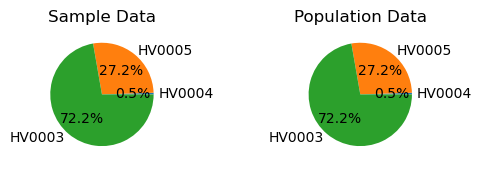

shared_request_flag


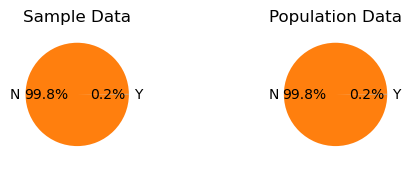

shared_match_flag


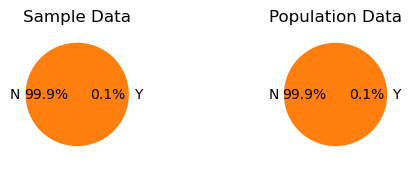

access_a_ride_flag


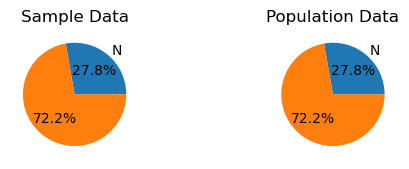

wav_request_flag


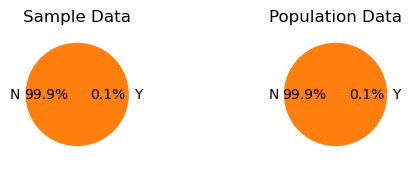

wav_match_flag


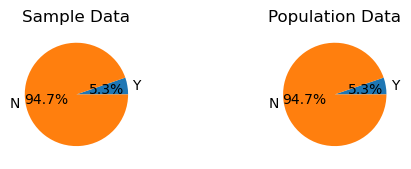

In [17]:
for column in imp_string_col:

    sample_counts_pandas, population_counts_pandas = pandas_dataframe(sample_df, population_df, column)

    fig, axs = plt.subplots(1, 2, figsize=(5, 5))

    # Sample Data Pie Chart
    axs[0].pie(sample_counts_pandas["count"], labels=sample_counts_pandas[column], autopct='%1.1f%%')
    axs[0].set_title('Sample Data')

    # Population Data Pie Chart
    axs[1].pie(population_counts_pandas["count"], labels=population_counts_pandas[column], autopct='%1.1f%%')
    axs[1].set_title('Population Data')

    print(column)
    plt.subplots_adjust(wspace=1)
    plt.show()

**PULocationID** and **DOLocationID** indicate the area location therefore they are also part of categorical variables

In [82]:
print(sample_df.select('PULocationID').distinct().count())
print(population_df.select('PULocationID').distinct().count())

263


263


In [83]:
print(sample_df.select('DOLocationID').distinct().count())
print(population_df.select('DOLocationID').distinct().count())

263


264


In [121]:
# PULocationID

In [47]:
sample_PU_df, population_PU_df = pandas_dataframe(sample_df, population_df, "PULocationID")

In [48]:
sample_PU_df['percentage'] = (sample_PU_df['PULocationID'] / sample_PU_df['PULocationID'].sum()) * 100

In [49]:
population_PU_df['percentage'] = (population_PU_df['PULocationID'] / population_PU_df['PULocationID'].sum()) * 100

In [59]:
sample_PU_df = sample_PU_df.sort_values('PULocationID')
sample_PU_df = sample_PU_df.set_index('PULocationID')

In [60]:
population_PU_df = population_PU_df.sort_values('PULocationID')
population_PU_df = population_PU_df.set_index('PULocationID')

In [67]:
sum(abs(sample_PU_df['percentage'] - population_PU_df['percentage']))

0.0

In [122]:
# DOLocationID

In [123]:
sample_DO_df, population_DO_df = pandas_dataframe(sample_df, population_df, "DOLocationID")

In [124]:
population_DO_df.loc[~population_DO_df['DOLocationID'].isin(sample_DO_df['DOLocationID']), 'DOLocationID']

262    199
Name: DOLocationID, dtype: int64

In [130]:
temp = population_DO_df[population_DO_df['DOLocationID']==199]
temp

,DOLocationID,count
262,199,7


In [132]:
sample_DO_df = pd.concat([sample_DO_df, temp])

In [133]:
sample_DO_df['percentage'] = (sample_DO_df['DOLocationID'] / sample_DO_df['DOLocationID'].sum()) * 100

In [134]:
population_DO_df['percentage'] = (population_DO_df['DOLocationID'] / population_DO_df['DOLocationID'].sum()) * 100

In [135]:
sample_DO_df = sample_DO_df.sort_values('DOLocationID')
sample_DO_df = sample_DO_df.set_index('DOLocationID')

In [136]:
population_DO_df = population_DO_df.sort_values('DOLocationID')
population_DO_df = population_DO_df.set_index('DOLocationID')

In [137]:
print(sample_DO_df.shape)
print(population_DO_df.shape)

(264, 2)
(264, 2)


In [138]:
sum(abs(sample_DO_df['percentage'] - population_DO_df['percentage']))

0.0

Since there was a **DOLocationID** not part of sample data we would add that in our sample.

In [142]:
sample_df.count()

17459672

In [13]:
sample_df = sample_df.union(population_df.filter(population_df.DOLocationID==199))

In [152]:
sample_df.count()

17459679

# 2. Numeric data comparison

## 2.1 Descriptive Statistics comparison

In [41]:
numeric_col = [col_name for col_name, col_type in column_types if col_type == "double" or col_type == "bigint"]
numeric_col

['PULocationID',
 'DOLocationID',
 'trip_miles',
 'trip_time',
 'base_passenger_fare',
 'tolls',
 'bcf',
 'sales_tax',
 'congestion_surcharge',
 'airport_fee',
 'tips',
 'driver_pay']

In [42]:
numeric_col.remove('PULocationID')
numeric_col.remove('DOLocationID')
numeric_col.remove('airport_fee')

In [228]:
stat_values = {"column":[], "population_mean":[], "sample_mean": [], "population_std":[], "sample_std": []}

In [229]:
for column in numeric_col:
    print(column)
    p_mean = population_df.agg({column:'mean'}).collect()[0][0]
    s_mean = sample_df.agg({column:'mean'}).collect()[0][0]
    p_std = population_df.agg({column:'std'}).collect()[0][0]
    s_std = sample_df.agg({column:'std'}).collect()[0][0]
    
    stat_values['column'].append(column)
    stat_values['population_mean'].append(p_mean)
    stat_values['sample_mean'].append(s_mean)
    stat_values["population_std"].append(p_std)
    stat_values['sample_std'].append(s_std)

trip_miles
trip_time
base_passenger_fare
tolls
bcf
sales_tax
congestion_surcharge
tips
driver_pay


In [231]:
df = pd.DataFrame(stat_values)
df.head(3)

,column,population_mean,sample_mean,population_std,sample_std
0,trip_miles,4.837050,4.841758,5.494036,5.502535
1,trip_time,1100.791717,1101.341477,777.909417,779.377771
2,base_passenger_fare,21.988807,22.000066,17.480711,17.498284


### Z-test

In [232]:
df['z_statistic'] = (df['sample_mean'] - df['population_mean']) / (df['population_std'] / df['sample_std'])
df['p_value'] = 2 * (1 - norm.cdf(abs(df['z_statistic'])))

In [233]:
df

,column,population_mean,sample_mean,population_std,sample_std,z_statistic,p_value
0,trip_miles,4.837050,4.841758,5.494036,5.502535,0.004715,0.996238
1,trip_time,1100.791717,1101.341477,777.909417,779.377771,0.550797,0.581773
2,base_passenger_fare,21.988807,22.000066,17.480711,17.498284,0.011270,0.991008
3,tolls,0.943363,0.945189,3.487707,3.491490,0.001827,0.998542
4,bcf,0.684129,0.684579,0.590197,0.591026,0.000451,0.999641
5,sales_tax,1.880665,1.881349,1.486828,1.488517,0.000685,0.999453
6,congestion_surcharge,1.042683,1.042755,1.345811,1.345875,0.000072,0.999942
7,tips,0.838496,0.838686,2.674253,2.676854,0.000190,0.999848
8,driver_pay,17.674969,17.685765,13.778732,13.804380,0.010816,0.991371


## 2.2 KDE plot

In [17]:
seed = np.random.randint(0,100,3)

Exception in thread "serve-DataFrame" java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:705)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:749)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:673)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:639)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:615)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:572)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:530)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:65)


trip_miles


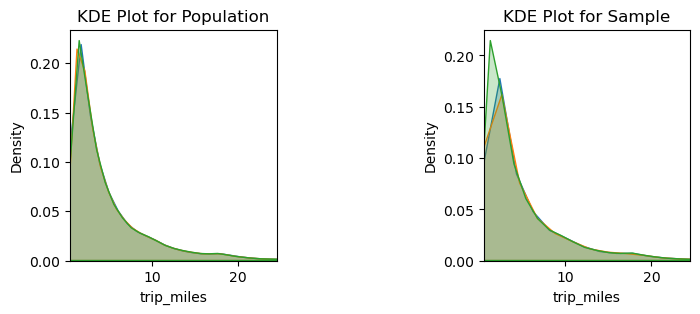

trip_time


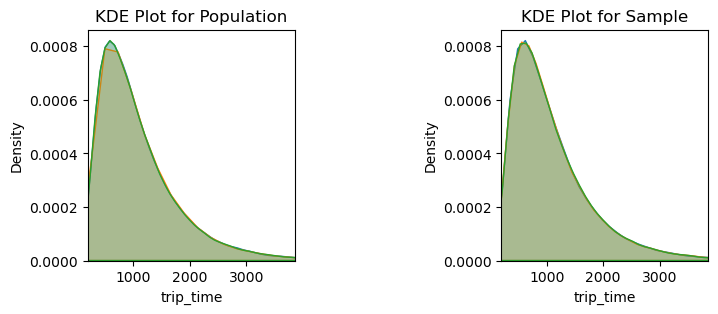

base_passenger_fare


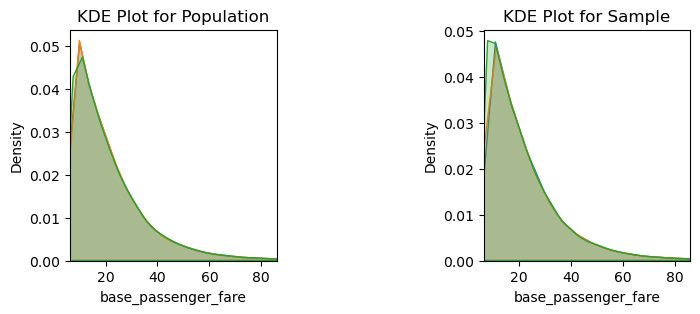

tolls


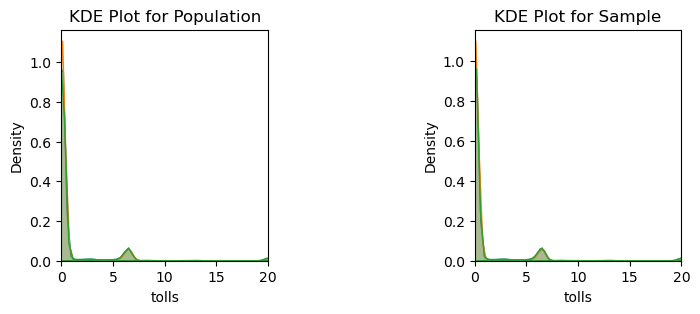

bcf


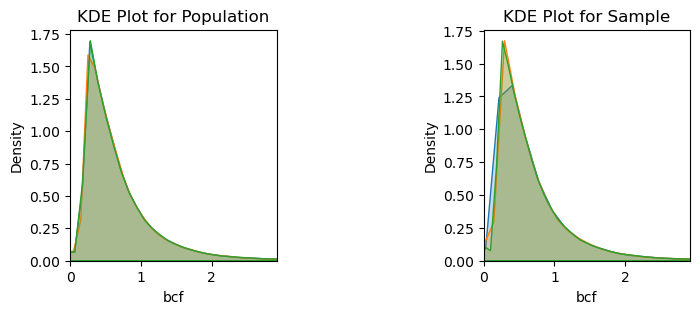

sales_tax


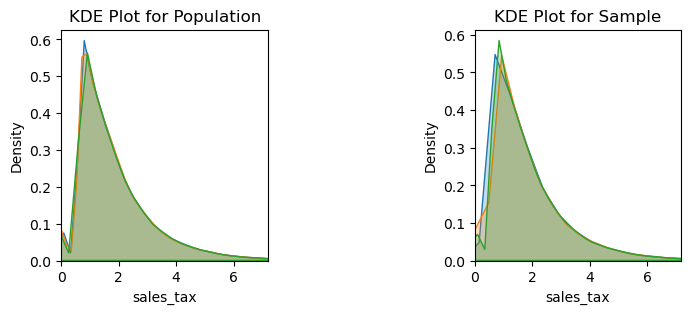

congestion_surcharge


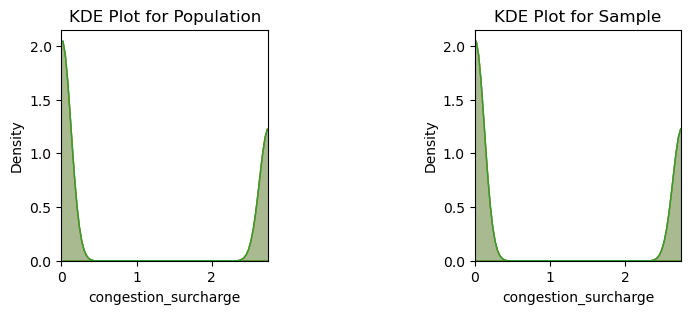

tips


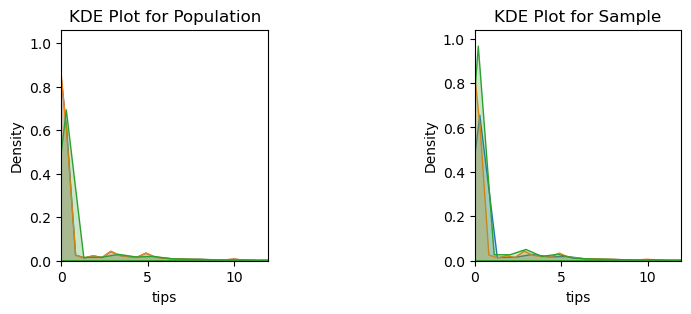

driver_pay


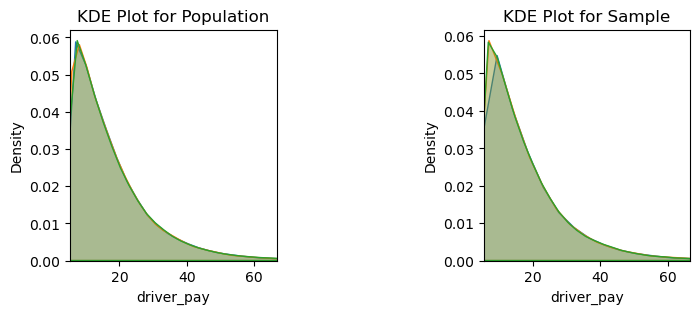

In [47]:
for column in numeric_col:
    plt.figure(figsize=(8, 3))

    for s in seed:
        population_sample = population_df.select(column).sample(False, 0.001, seed=s).toPandas()
        sample_data = sample_df.select(column).sample(False, 0.01, seed=s).toPandas()

        max_value = np.percentile(population_sample[column], 99)
        min_value = np.percentile(population_sample[column], 1)

        plt.subplot(1, 2, 1)
        sns.kdeplot(population_sample[column], fill=True)
        plt.title('KDE Plot for Population')
        plt.xlim(min_value, max_value)

        plt.subplot(1, 2, 2)
        sns.kdeplot(sample_data[column], fill=True)
        plt.title('KDE Plot for Sample')
        plt.xlim(min_value, max_value)

    # Show the plot
    print(column)
    plt.subplots_adjust(wspace=1)
    plt.show()

# 3. Time series data comparison

## 3.1  Date ranges

In [14]:
from pyspark.sql.functions import col, date_format, hour, to_date

In [53]:
# Get date of trip
sample_df = sample_df.withColumn("pickup_date", to_date(col("pickup_datetime")))
population_df = population_df.withColumn("pickup_date", to_date(col("pickup_datetime")))

In [54]:
print('Population: ', population_df.select('pickup_date').distinct().count())
print('Sample: ', sample_df.select('pickup_date').distinct().count())

Population:  365


Sample:  365


## 3.2 Day of the week data

In [55]:
sample_df = sample_df.withColumn("day_of_week", date_format(col("pickup_datetime"), "EEEE"))
population_df = population_df.withColumn("day_of_week", date_format(col("pickup_datetime"), "EEEE"))

In [ ]:
sample_counts_pandas, population_counts_pandas = pandas_dataframe(sample_df, population_df, "day_of_week")

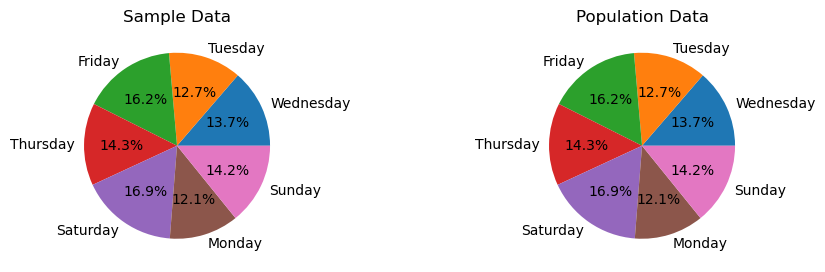

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(9, 9))

# Sample Data Pie Chart
axs[0].pie(sample_counts_pandas["count"], labels=sample_counts_pandas["day_of_week"], autopct='%1.1f%%')
axs[0].set_title('Sample Data')

    # Population Data Pie Chart
axs[1].pie(population_counts_pandas["count"], labels=population_counts_pandas["day_of_week"], autopct='%1.1f%%')
axs[1].set_title('Population Data')

plt.subplots_adjust(wspace=1)
plt.show()

## 3.3 Hour of the day

In [15]:
sample_df = sample_df.withColumn("hour_of_day", hour(col("pickup_datetime")))
population_df = population_df.withColumn("hour_of_day", hour(col("pickup_datetime")))

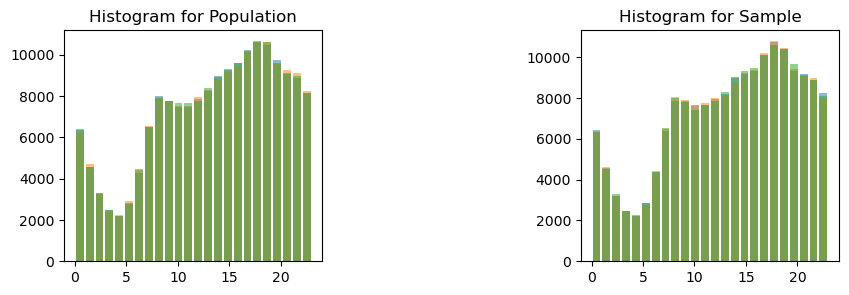

In [19]:
plt.figure(figsize=(10, 3))

for s in seed:
    population_sample = population_df.select("hour_of_day").sample(False, 0.001, seed=s).toPandas()
    sample_data = sample_df.select("hour_of_day").sample(False, 0.01, seed=s).toPandas()

    plt.subplot(1, 2, 1)
    plt.hist(population_sample["hour_of_day"], bins=24, rwidth=0.8, alpha=0.5)    
    plt.title('Histogram for Population')

    plt.subplot(1, 2, 2)
    plt.hist(sample_data["hour_of_day"], bins=24, rwidth=0.8, alpha=0.5)
    plt.title('Histogram for Sample')


plt.subplots_adjust(wspace=1)
plt.show()